In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
# I will use only df for the exploratory data analysis and leave out df2 for this section.
df = pd.read_pickle("new_df.pkl")

In [2]:
def clean_for_eda(sentence):
    sentence = re.sub("really","",sentence)
    sentence = re.sub("like","",sentence)
    sentence = re.sub("just","",sentence)
    sentence = re.sub("good","",sentence)
    sentence = re.sub("great","",sentence)
    sentence = re.sub("place","",sentence)
    sentence = re.sub("went","",sentence)
    sentence = re.sub("singapore","",sentence)
    sentence = re.sub("centre","",sentence)
    sentence = re.sub("best","",sentence)
    sentence = re.sub("building","",sentence)
    sentence = re.sub("area","",sentence)
    sentence = re.sub("dont","",sentence)
    sentence = re.sub("want","",sentence)
    sentence = re.sub("nice","",sentence)
    sentence = re.sub("order","",sentence)
    sentence = re.sub("court","",sentence)
    sentence = re.sub("table","",sentence)
    sentence = re.sub("come","",sentence)
    sentence = re.sub("lots","",sentence)
    sentence = re.sub("better","",sentence)
    sentence = re.sub("amazing","",sentence)
    sentence = re.sub("set","",sentence)
    sentence = re.sub("experience","",sentence)
    sentence = re.sub("tried","",sentence)
    sentence = re.sub("trying","",sentence)
    sentence = re.sub("tried","",sentence)
    sentence = re.sub("try","",sentence)
    sentence = re.sub("bad","",sentence)
    
    return sentence
clean = lambda x : clean_for_eda(x)
df['review'] = df['review'].apply(clean_for_eda)

In [3]:
cv = CountVectorizer(stop_words = 'english')
data_cv = cv.fit_transform(df['review'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
data_dtm.index = df.index
data_dtm

,abdomen,ability,able,abound,abrubt,absolulety,absolute,absolutely,abundance,abundant,...,yum,yummiest,yummy,zao,zealous,zha,zingy,zion,zone,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1675,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.iloc[1241,:]

review_num                                           Review1242
review        in my previous review i complained about poor ...
rating                                                        5
Name: 1241, dtype: object

In [5]:
# Now that I have the ratings, from this column, I want another column that showcases the satisfactory level. In this case, 
# when rating >= 2.5, the satisfactory level will be given a value of 1 and 0 otherwise.
def sentiment(x):
    if x >= 2.5:
        return 1
    else:
        return 0
df['true_satisfactory_level'] = df['rating'].apply(sentiment)
df = df.drop(['rating'], axis = 1)
df

,review_num,review,true_satisfactory_level
0,Review1,always love to visit here there are so many op...,1
1,Review2,a tourist attraction to visit and enjoy local...,1
2,Review3,for breakfast especially those who are into ...,1
3,Review4,fun and interesting food some not to my taste...,1
4,Review5,so butter chicken and naan ly with lime j...,1
...,...,...,...
1674,Review1675,we this old hawker center unfortunately it ...,1
1675,Review1676,it was still under renovation during my visit ...,1
1676,Review1677,to satay number on boon tat st excellent sa...,1
1677,Review1678,is the for satay at promptly pm the street ...,1


In [6]:
df.iloc[1241,:]

review_num                                                        Review1242
review                     in my previous review i complained about poor ...
true_satisfactory_level                                                    1
Name: 1241, dtype: object

1    1590
0      88
Name: true_satisfactory_level, dtype: int64


<AxesSubplot:>

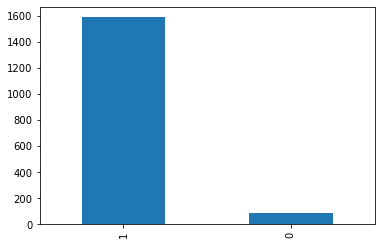

In [7]:
print(df['true_satisfactory_level'].value_counts())
df['true_satisfactory_level'].value_counts().plot.bar()
# From the histogram, we can see that the actual number of people who are satisfied outnumber the number of people who are 
# not satisfied by more than 10 times! In such a scenario, we have to note that we cannot use accuracy as a metric to decide
# on the sentiment classifier. Rather, we can use precision, recall and f1 score.

In [8]:
satisfied = df[df['true_satisfactory_level']==1]
satisfied

,review_num,review,true_satisfactory_level
0,Review1,always love to visit here there are so many op...,1
1,Review2,a tourist attraction to visit and enjoy local...,1
2,Review3,for breakfast especially those who are into ...,1
3,Review4,fun and interesting food some not to my taste...,1
4,Review5,so butter chicken and naan ly with lime j...,1
...,...,...,...
1674,Review1675,we this old hawker center unfortunately it ...,1
1675,Review1676,it was still under renovation during my visit ...,1
1676,Review1677,to satay number on boon tat st excellent sa...,1
1677,Review1678,is the for satay at promptly pm the street ...,1


In [9]:
cv_satisfied = CountVectorizer(stop_words = 'english')
data_cv_satisfied = cv_satisfied.fit_transform(satisfied['review'])
data_dtm_satisfied = pd.DataFrame(data_cv_satisfied.toarray(), columns = cv_satisfied.get_feature_names())
data_dtm_satisfied

,abdomen,ability,able,abound,abrubt,absolulety,absolute,absolutely,abundance,abundant,...,yum,yummiest,yummy,zao,zealous,zha,zingy,zion,zone,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1586,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# To get the total count of the different words from reviews made by satisfied patrons
intermediate_arr = data_cv_satisfied.toarray().sum(axis = 0)
words = cv_satisfied.get_feature_names()

# To get the top 40 words 
index = sorted(range(len(intermediate_arr)), key = lambda i : intermediate_arr[i])[-40:]
top_40_words = []

# index_lis is to hold the indexes of the top words 
index_lis = []
for i in index:
    top_40_words.append(words[i])
    index_lis.append(i)
print(top_40_words)
print(index)

['closed', 'ed', 'worth', 'inside', 'open', 'beef', 'choice', 'evening', 'taste', 'clean', 'chinese', 'price', 'dinner', 'people', 'choose', 'dishes', 'rice', 'atmosphere', 'lunch', 'delicious', 'outside', 'prices', 'indian', 'beer', 'different', 'cheap', 'eat', 'night', 'variety', 'market', 'time', 'local', 'visit', 'stall', 'chicken', 'hawker', 'street', 'stalls', 'satay', 'food']
[813, 1444, 5708, 2435, 3279, 372, 752, 1559, 4988, 795, 744, 3696, 1272, 3474, 756, 1305, 4076, 236, 2805, 1180, 3336, 3701, 2392, 375, 1252, 700, 1428, 3139, 5446, 2869, 5143, 2750, 5509, 4715, 723, 2152, 4825, 4720, 4200, 1817]


In [11]:
# get the frequency counts of the respective words
frequency_count_top_words = []
for i in index_lis:
    frequency_count_top_words.append(intermediate_arr[i])
frequency_count_top_words
# top_word_df = pd.DataFrame(list(zip(top_40_words, frequency_count_top_words)), columns = ['words', 'frequency'])
top_word_df = pd.DataFrame({'words':top_40_words, 'frequency':frequency_count_top_words})
# top_word_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'closed'),
  Text(1, 0, 'ed'),
  Text(2, 0, 'worth'),
  Text(3, 0, 'inside'),
  Text(4, 0, 'open'),
  Text(5, 0, 'beef'),
  Text(6, 0, 'choice'),
  Text(7, 0, 'evening'),
  Text(8, 0, 'taste'),
  Text(9, 0, 'clean'),
  Text(10, 0, 'chinese'),
  Text(11, 0, 'price'),
  Text(12, 0, 'dinner'),
  Text(13, 0, 'people'),
  Text(14, 0, 'choose'),
  Text(15, 0, 'dishes'),
  Text(16, 0, 'rice'),
  Text(17, 0, 'atmosphere'),
  Text(18, 0, 'lunch'),
  Text(19, 0, 'delicious'),
  Text(20, 0, 'outside'),
  Text(21, 0, 'prices'),
  Text(22, 0, 'indian'),
  Text(23, 0, 'beer'),
  Text(24, 0, 'different'),
  Text(25, 0, 'cheap'),
  Text(26, 0, 'eat'),
  Text(27, 0, 'night'),
  Text(28, 0, 'variety'),
  Text(29, 0, 'market'),
  Text(30, 0, 'time'),
  Text(31, 0, 'local'),
  Text(32, 0, 'visit'),
  Text(33, 

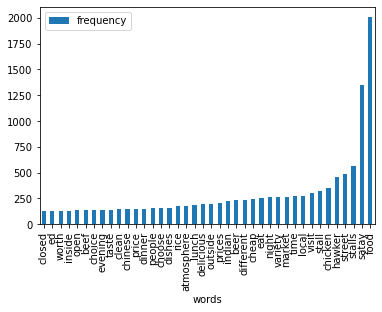

In [12]:
# plt.xticks(rotation = 90)
top_word_df.plot.bar(x = 'words', y = 'frequency', rot = 0)
plt.xticks(rotation = 90)
# From the bar chart, it seems that the common consensus amongst people who are satisfied is that there are markets and hawkers
# around Lau Pa Sat. Also, around Lau Pa Sat, there are places that sell a variety of food, which are cheap and delicious.
# Examples of such food include beef, chicken, satay and presumably indian food. Moreover, it also suggests that Lau Pa Sat 
# is a good place to go to for lunch and dinner. It is a place that also has great atmosphere and is clean.

In [13]:
# Now we will go through the reason why people are unsatisfied with Lau Pa Sat.
unsatisfied = df[df['true_satisfactory_level']==0]
unsatisfied

,review_num,review,true_satisfactory_level
34,Review35,horrible food low quality and poor hygiene use...,0
66,Review67,don’t bother with the so called satay club the...,0
71,Review72,seen reviews and videos about super satay wed...,0
79,Review80,we walked around to find somewhere we felt i...,0
89,Review90,very overrated and not worth it you are off g...,0
...,...,...,...
1657,Review1658,second visit to the newly renovated it is sti...,0
1659,Review1660,we ed satay and they all tasted of kerosene mu...,0
1668,Review1669,to stall presented with the special tourist...,0
1669,Review1670,the stall owners keep to get you to sit in th...,0


In [14]:
cv_unsatisfied = CountVectorizer(stop_words = 'english')
data_cv_unsatisfied = cv_unsatisfied.fit_transform(unsatisfied['review'])
data_dtm_unsatisfied = pd.DataFrame(data_cv_unsatisfied.toarray(), columns = cv_unsatisfied.get_feature_names())
data_dtm_unsatisfied

,absolutely,accep,accuse,action,actual,actually,adam,adamantly,add,advertisement,...,wry,xs,year,years,yell,yes,yolk,youmost,yrs,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [15]:
# To get the total count of the different words from reviews made by satisfied patrons
intermediate_arr2 = data_cv_unsatisfied.toarray().sum(axis = 0)
words = cv_unsatisfied.get_feature_names()

# To get the top 40 words 
index = sorted(range(len(intermediate_arr2)), key = lambda i : intermediate_arr2[i])[-40:]
top_40_words = []

# index_lis is to hold the indexes of the top words 
index_lis = []
for i in index:
    top_40_words.append(words[i])
    index_lis.append(i)
print(top_40_words)
print(index)

['fried', 'know', 'noodle', 'plastic', 'thing', 'told', 'cold', 'eating', 'prices', 'sat', 'service', 'staff', 'vendors', 'dishes', 'make', 'rice', 'sauce', 'years', 'beer', 'meal', 'people', 'street', 'taste', 'time', 'tourists', 'poor', 'tourist', 'expensive', 'cheap', 'chicken', 'eat', 'price', 'stalls', 'quality', 'hawker', 'local', 'ed', 'stall', 'satay', 'food']
[421, 572, 701, 791, 1107, 1123, 193, 330, 821, 922, 961, 1035, 1191, 302, 643, 896, 929, 1256, 80, 655, 771, 1056, 1087, 1114, 1133, 798, 1131, 363, 157, 162, 328, 817, 1037, 832, 478, 615, 331, 1036, 923, 405]


In [16]:
# get the frequency counts of the respective words
frequency_count_top_words = []
for i in index_lis:
    frequency_count_top_words.append(intermediate_arr2[i])
frequency_count_top_words
top_word_df = pd.DataFrame({'words':top_40_words, 'frequency':frequency_count_top_words})
top_word_df

,words,frequency
0,fried,8
1,know,8
2,noodle,8
3,plastic,8
4,thing,8
5,told,8
6,cold,9
7,eating,9
8,prices,9
9,sat,9


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'fried'),
  Text(1, 0, 'know'),
  Text(2, 0, 'noodle'),
  Text(3, 0, 'plastic'),
  Text(4, 0, 'thing'),
  Text(5, 0, 'told'),
  Text(6, 0, 'cold'),
  Text(7, 0, 'eating'),
  Text(8, 0, 'prices'),
  Text(9, 0, 'sat'),
  Text(10, 0, 'service'),
  Text(11, 0, 'staff'),
  Text(12, 0, 'vendors'),
  Text(13, 0, 'dishes'),
  Text(14, 0, 'make'),
  Text(15, 0, 'rice'),
  Text(16, 0, 'sauce'),
  Text(17, 0, 'years'),
  Text(18, 0, 'beer'),
  Text(19, 0, 'meal'),
  Text(20, 0, 'people'),
  Text(21, 0, 'street'),
  Text(22, 0, 'taste'),
  Text(23, 0, 'time'),
  Text(24, 0, 'tourists'),
  Text(25, 0, 'poor'),
  Text(26, 0, 'tourist'),
  Text(27, 0, 'expensive'),
  Text(28, 0, 'cheap'),
  Text(29, 0, 'chicken'),
  Text(30, 0, 'eat'),
  Text(31, 0, 'price'),
  Text(32, 0, 'stalls'),
  Text(33, 0, 'qualit

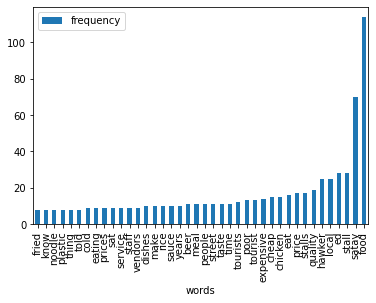

In [17]:
top_word_df.plot.bar(x = 'words', y = 'frequency', rot = 0)
plt.xticks(rotation = 90)
# Interestingly, for people who are not satisfied, the main issue that they have is the food. It appears that the quality of 
# food is not as good as what they expected. Also, some of the food sold to them is expensive, so much so that the stalls
# were classified as tourist traps. We can also assume that the service rendered by the staff is not very good. As such, tourists
# should take note before heading down to Lau Pa Sat. 

In [18]:
# unsatisfied[unsatisfied['review'].str.contains("vendors")]
# unsatisfied[unsatisfied['review'].str.contains("sauce")]
# unsatisfied[unsatisfied['review'].str.contains("plastic")]
unsatisfied[unsatisfied['review'].str.contains("cold")]
# Diving deeper, we can see that there are some problematic issues that is worthy of noting. It appears that certain vendors
# do not practise proper hygiene, which disgusted several patrons and someone even had diarrhoea after consuming the food. 

# This final takeaway does not serve to undermine the severity the issue, but since the number of positive comments outnumber 
# the negative ones by more than 10 to 1, perhaps its worth to take the small risk heading down to Lau Pa Sat to have a good
# time!

,review_num,review,true_satisfactory_level
71,Review72,seen reviews and videos about super satay wed...,0
359,Review360,we are visitors to my son said he ed to sata...,0
624,Review625,was there with my friends on sep cos we ed s...,0
1119,Review1120,not at all the food quality is poor when it i...,0
1324,Review1325,i had read a lot about but felt it was not as...,0
1671,Review1672,this was one big disappointedment as it´s cur...,0
